# Лабораторная работа 2. Построение модели 

## Импорт библиотек и настройки

In [ ]:
import os # библиотека для работы с операционной системой

import numpy as np  # библиотека для поддержки больших многомерных массивов и матриц
import pandas as pd  # библиотека для обработки данных в виде (таблиц) датафреймов

import matplotlib.pyplot as plt # библиотка двумерной графики
import seaborn as sns # библиотка для визуалицаии данных
# функция, которая позволяет отображать графики matplotlib непосредственно в ячейке, где они были сделаны
%matplotlib inline 
import warnings  # библиотека для работы с предупреждениями
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Зададим пути для входных данных и сохранения результатов

In [ ]:
inputPath = "../0. data/" # Введите путь до каталога с входными данными
outputPath = "./output/" # Введите путь до желаемого каталога с результатами
if not os.path.exists(outputPath): # Проверка существования папки с результатами
    os.makedirs(outputPath)     # Создание папки с результатами,  в случае если ее не существует

## Чтение данных

Считаем данные и выведем первые несколько строк таблицы

In [ ]:
data_pd = pd.read_csv('ModelData.csv', index_col=0)
data_pd

FileNotFoundError: ignored

# 1. Построение модели

**Для построения модели логистической регрессии в Python существует две различных библиотеки:**
- **statsmodels. Чаще используется для статистических целей, так как обладает широким набором статистических тестов**
- **sklearn. Чаще используется для реализации методов машинного обучения. Направлена на решение задач классификации, включает наиболее распространенные метрики, не отличается большим набором статистических тестов.**

**В данном примере показано, что обе библиотеки равноправны, дают одинаковый результат и выбор библиотеки производится с учетом целей пользователя**    



### Построим модель с использованием библиотеки statsmodels

In [ ]:
import statsmodels.api as sm # импортируем библиотеку

X_sm = data_pd.drop('default_flag', axis=1).copy() # сформируем датафрейм независимых переменных путем копирования исходного датафрейма с удаленным столбцом "default_flag"
y_sm = data_pd['default_flag'].copy() #зависимая переменная
X_sm['intercept'] = 1 # добавим единичный столбец, чтоб оценить коэффициент пересечения

model = sm.Logit(y_sm, X_sm, intercept=True)  # построим модель логистической регрессии
model_result = model.fit() # оценим параметры модели
print(model_result.summary2()) # выведем результаты


Optimization terminated successfully.
         Current function value: 0.125979
         Iterations 9
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.388    
Dependent Variable:       default_flag           AIC:                    6432.1183
Date:                     2022-03-24 18:54       BIC:                    6497.2787
No. Observations:         25465                  Log-Likelihood:         -3208.1  
Df Model:                 7                      LL-Null:                -5238.4  
Df Residuals:             25457                  LLR p-value:            0.0000   
Converged:                1.0000                 Scale:                  1.0000   
No. Iterations:           9.0000                                                  
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------

### Построим модель с использованием библиотеки sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression # импортируем из библиотеки sklearn класс для построения моделей лог.регрессии

X = data_pd.drop('default_flag', axis=1).copy() # сформируем датафрейм независимых переменных путем копирования исходного датафрейма с удаленным столбцом "default_flag"
y = data_pd['default_flag'].copy() #зависимая переменная

logreg = LogisticRegression(C=1e9, fit_intercept=True) # построим модель логистической регрессии
logreg.fit(X, y) #оценка параметров модели

# Выведем коэффициенты модели и пересечение
print('Коэффициенты модели:', logreg.coef_)
print('Пересечение:', logreg.intercept_)


 

Коэффициенты модели: [[-0.80830606 -0.52850994 -0.94134367 -0.06250825 -0.14203597 -0.30522203
  -0.95178053]]
Пересечение: [-2.89366744]


# 2. Проверка значимости коэффициентов логистической регрессии и уравнения модели

**Цель Теста** Проверка значимости полученных коэффициентов модели, всего уравнения в целом.

**Описание теста** Для проверки значимости коэффициентов используется тест Вальда, всего уравнения в целом – Тест отношения правдоподобий 

In [ ]:
model_result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                    Logit                  Pseudo R-squared:       0.388    
Dependent Variable:       default_flag           AIC:                    6432.1183
Date:                     2022-03-24 18:54       BIC:                    6497.2787
No. Observations:         25465                  Log-Likelihood:         -3208.1  
Df Model:                 7                      LL-Null:                -5238.4  
Df Residuals:             25457                  LLR p-value:            0.0000   
Converged:                1.0000                 Scale:                  1.0000   
No. Iterations:           9.0000                                                  
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------
woe_max_arrears_12m               -0.8083   0.0323 -25.0608 0.0000 -0.8715 -0.7451
woe_bureau_score                  -0.5285   0.0539  -9.7968 0.0000 -0.6342 -0.4228
woe_cc_util                       -0.9413   0.0291 -32.3267 0.0000 -0.9984 -0.8843
woe_num_ccj                       -0.0625   0.0822  -0.7597 0.4474 -0.2237  0.0987
woe_emp_length                    -0.1420   0.0898  -1.5805 0.1140 -0.3181  0.0341
woe_months_since_recent_cc_delinq -0.3052   0.0694  -4.4003 0.0000 -0.4412 -0.1693
woe_annual_income                 -0.9518   0.0506 -18.8218 0.0000 -1.0509 -0.8527
intercept                         -2.8936   0.0410 -70.5998 0.0000 -2.9740 -2.8133
==================================================================================

"""

В столбце таблицы $P>|z|$ можно увидеть значения p-value для каждого из коэффициентов модели. Значение p-value для теста правдоподобий можно увидеть вверху таблицы LLR p-value

### Задание: Сделайте вывод о значимости коэффициентов модели и уравнения вцелом.

* Незначительная Z-оценка предполагает, что коэффициент может быть исключен из модели. Поэтому можно сделать вывод, что коэффициенты `woe_num_ccj, woe_emp_length` статистически незначимы

* Уравнение тоже значимо

# 3. Оценка качества построенной модели

### Разделим выборку на тестовую и тренировочную

In [ ]:
#имортируем функцию, позволяющую делить выборку на тестовую и тренировочную в случайном порядке:
from sklearn.model_selection import train_test_split 

#Аргументы функции:
# X-датафрейм независимых переменных
# y - зависимая переменная
# test_size - размер тестовой выборки в %
# random_state - начальная точка генератора случайных чисел. Для воспроизведения результата необходимо указать любое число.

# Результат работы функции:
# X_train - датафрейм независимых переменных тренировочная выборка
# X_test - датафрейм независимых переменных тестовая выборка
# y_train - зависимая переменная тренировочная выборка
# y_test - зависимая переменная тестовая выборка

In [ ]:
#Разделим выборку на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(data_pd.drop('default_flag', axis=1), 
                                                    data_pd['default_flag'], test_size=.3, 
                                                    random_state=2122)
train_full = pd.concat([y_train, X_train], axis=1) # объединим независимые и зависимую пременные тренировочной выборки в общий датафрейм
test_full = pd.concat([y_test, X_test], axis=1)# объединим независимые и зависимую пременные тестовой выборки в общий датафрейм


### Проверим, насколько равномерно разделены данные с дефолтами заемщиков и без дефолтов по выборкам

**Цель теста** Проверить равномерность разделения данных на тестовую и тренировочную выборки

**Описание теста** Расчитаем соотношения доли дефолтов в тестовой и тренировочной выборках. Если соотношение одинаковое -  данные разделены удовлетворительно

In [ ]:
# посмотрим сколько дефолтных и недефолтных наблюдений в тренировочной выборке
# функция value_counts() считает кол-во элементов каждого уникального значения в выборке
train_full['default_flag'].value_counts() 

0    16883
1      942
Name: default_flag, dtype: int64

In [ ]:
# Расчитаем соотношение доли дефолтов в процентах, для этого поделим кол-во дефолтов на общее кол-во наблюдений:
w_train = (train_full['default_flag'].value_counts()[1] / train_full['default_flag'].value_counts().sum()) * 100
# round() позволяет округлить результат. Указывая вторым аргументом "2" получим округление до 2го значка после запятой
print('Доля дефолтов в тренировочной выборке:', round(w_train, 2), '%')

Доля дефолтов в тренировочной выборке: 5.28 %


In [ ]:
# посмотрим сколько дефолтных и недефолтных наблюдений в тестовой выборке
# функция value_counts() считает кол-во элементов каждого уникального значения в выборке
test_full['default_flag'].value_counts()

0    7246
1     394
Name: default_flag, dtype: int64

In [ ]:
# Расчитаем соотношение доли дефолтов в процентах, для этого поделим кол-во дефолтов на общее кол-во наблюдений:
w_test = (test_full['default_flag'].value_counts()[1] / test_full['default_flag'].value_counts().sum()) * 100
# round() позволяет округлить результат. Указывая вторым аргументом "2" получим округление до 2го значка после запятой
print('Доля дефолтов в тестовой выборке:', round(w_test, 2), '%')

Доля дефолтов в тестовой выборке: 5.16 %


### Задание: Расчитайте долю дефолтов в полной выборке

In [ ]:
w_deafolt_full = (data_pd['default_flag'].value_counts()[1] / data_pd['default_flag'].value_counts().sum()) *100

print('Доля дефолтов в полной выборке:', round(w_deafolt_full, 2), '%')

Доля дефолтов в полной выборке: 5.25 %


### Построим модель логистической регрессии на тренировочной выборке:

In [ ]:
X_train_sm =X_train.copy() # скопируем датафрейм не

X_train_sm['intercept'] = 1 # добавим единичный столбец, чтоб оценить коэффициент пересечения
model = sm.Logit(y_train, X_train_sm, intercept=True)  # построим модель
model_result = model.fit() # оценка параметров модели
print(model_result.summary2()) # выведем результаты

Optimization terminated successfully.
         Current function value: 0.125932
         Iterations 9
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.391    
Dependent Variable:       default_flag           AIC:                    4505.4581
Date:                     2022-03-24 18:55       BIC:                    4567.7650
No. Observations:         17825                  Log-Likelihood:         -2244.7  
Df Model:                 7                      LL-Null:                -3686.5  
Df Residuals:             17817                  LLR p-value:            0.0000   
Converged:                1.0000                 Scale:                  1.0000   
No. Iterations:           9.0000                                                  
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------

## 3.1 Дискриминационная способность

### Матрица ошибок (confusion matrix) 

**Матрица ошибок (confusion matrix)** — это таблица, которая позволяет визуализировать эффективность алгоритма классификации путем сравнения прогнозного значения целевой переменной с ее фактическим значением. Столбцы матрицы представляют наблюдения в фактическом классе, а строки — наблюдения в прогнозируемом классе.


In [ ]:
from sklearn.metrics import confusion_matrix # функция расчета матрицы ошибок

In [ ]:
y_pred = logreg.predict(X_test) # прогноз
confusion_matrix_logreg = confusion_matrix(y_test, y_pred) # Посчитаем матрицу ошибок
confusion_matrix_logreg # посмотрим на матрицу ошибок

array([[7183,   63],
       [ 281,  113]])

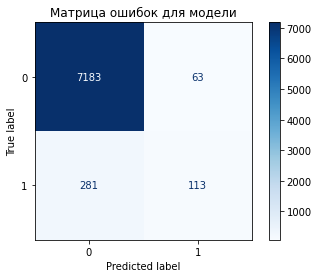

In [ ]:
from sklearn.metrics import plot_confusion_matrix # функция для визуализации матрицы ошибок
matrix = plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues) # нарисуем матрицу ошибок
plt.title('Матрица ошибок для модели') # зададим название графика
plt.show(matrix) # отобразим график


### Метрики качества классификации

In [ ]:
from sklearn.metrics import classification_report # функция для расчета метрик качества классификации

In [ ]:
print(classification_report(y_test, y_pred)) # выведем рассчитанные метрики качества

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7246
           1       0.64      0.29      0.40       394

    accuracy                           0.95      7640
   macro avg       0.80      0.64      0.69      7640
weighted avg       0.95      0.95      0.95      7640



### ROC-кривая и AUROC

In [ ]:
from sklearn.metrics import roc_auc_score # Функция для рассчета AUROC
from sklearn.metrics import roc_curve # Функция для построения ROC-кривой

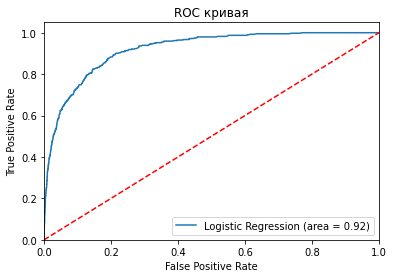

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]) # Расчет AUROC. На вход подаются наблюдаемые значения тестовой выборки и прогнозные
#logreg.predict_proba возвращает массив вероятностей принадлежности к каждому классу. Т.е. первый столбец - это вероятность того что у=0, второй - у=1
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1]) # Построение ROC- кривой
plt.figure() # создадим график
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc) #отобразим на графике ROC-кривую и значение AUROC
plt.plot([0, 1], [0, 1],'r--') # отобразим на графике ROC-кривую для случайной модели
plt.xlim([0.0, 1.0]) # ограничим отображение оси х на интервале [0,1] для удобной визуализации
plt.ylim([0.0, 1.05])# ограничим отображение оси y на интервале [0,1.05] для удобной визуализации
plt.xlabel('False Positive Rate') # название оси х
plt.ylabel('True Positive Rate') # название оси y
plt.title('ROC кривая')# название графика
plt.legend(loc="lower right") # расположение легенды
plt.savefig('Log_ROC') # сохранить график
plt.show(); # отобразитьграфик

### Коэффициент Джини

Расчитаем коэффициент Джини:

In [ ]:
gini = 2 * logit_roc_auc - 1
print('Коэффициент Джини:', round(gini,2))

Коэффициент Джини: 0.84


### Кросс-валидация

Данные делятся на g наборов. Затем модель обучается на g -1 наборах и тестируется на оставшемся наборе. Это повторяется для всех возможных комбинаций, в результате чего получается распределение оценки производительности (например, AUC, индекс Джини).


In [ ]:
from sklearn.model_selection import cross_val_score # импорт функции для проведения кросс-валидации

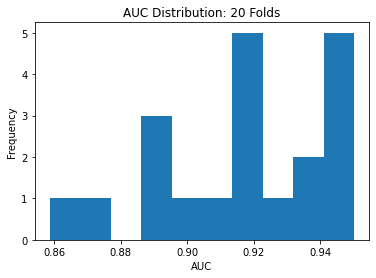

In [ ]:
scores = cross_val_score(logreg, X_test, y_test, cv=20, scoring='roc_auc') # вызов функции, в качестве аргументов предеются:
#logreg - построенная модель
#X_test - тестовая выборка независимых переменных 
#y_test - тестовые значения зависимых переменных
#cv - количество наборов g
#scoring - метрика, которая рассчитывается для каждой полученной модели

plt.figure() # создадим график
plt.hist(scores) # нарисуем гистограмму полученных значений AUROC
plt.xlabel('AUC') # название оси х
plt.ylabel('Frequency')# название оси у
plt.title('AUC Distribution: 20 Folds') # название графика
plt.show();# отображение графика

Распределение полученных значений AUC представлено на гистограмме

## Сводные результаты

![image.png](attachment:image.png)

## Задание

1. Изучите пошаговую процедуру построения модели логистической регрессии при помощи двух разных библиотек, показанную в рабочей книге Python Notebook «2. Построение модели».
2. Изучите реализацию оценки качества модели. Сделайте выводы о качестве построенной модели.

3.	Постройте модель логистической регрессии, используя только значимые по тесту Вальда переменные. Оцените качество получившийся модели.

4.	Сравните ключевые метрики качества для полученной модели и модели, представленной в рабочей книге Python Notebook «2. Построение модели». Какую модель следует выбрать?

In [ ]:

df_new = data_pd.drop(['woe_num_ccj', 'woe_emp_length'], axis=1) # Удалим статически незначимые параметры из датасета

X_new = df_new.drop('default_flag', axis=1).copy() # сформируем датафрейм независимых переменных путем копирования исходного датафрейма с удаленным столбцом "default_flag"
y_new = df_new['default_flag'].copy() #зависимая переменная

logreg = LogisticRegression(C=1e9, fit_intercept=True) # построим модель логистической регрессии
logreg.fit(X_new, y_new) #оценка параметров модели

# Выведем коэффициенты модели и пересечение
print('Коэффициенты модели:', logreg.coef_)
print('Пересечение:', logreg.intercept_)

Коэффициенты модели: [[-0.81251188 -0.54081145 -0.94173843 -0.30524816 -0.995083  ]]
Пересечение: [-2.8942799]


# 3. Оценка качества построенной модели без незначимых параметров

In [ ]:
#Разделим выборку на тестовую и тренировочную
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new.drop('default_flag', axis=1), 
                                                    df_new['default_flag'], test_size=.3, 
                                                    random_state=2122)
train_full_new = pd.concat([y_train_new, X_train_new], axis=1) # объединим независимые и зависимую пременные тренировочной выборки в общий датафрейм
test_full_new = pd.concat([y_test_new, X_test_new], axis=1)# объединим независимые и зависимую пременные тестовой выборки в общий датафрейм

## Проверим, насколько равномерно разделены данные с дефолтами заемщиков и без дефолтов по выборкам

In [ ]:
# посмотрим сколько дефолтных и недефолтных наблюдений в тренировочной выборке
# функция value_counts() считает кол-во элементов каждого уникального значения в выборке
train_full_new['default_flag'].value_counts() 

0    16883
1      942
Name: default_flag, dtype: int64

In [ ]:
# Расчитаем соотношение доли дефолтов в процентах, для этого поделим кол-во дефолтов на общее кол-во наблюдений:
w_train_new = (train_full_new['default_flag'].value_counts()[1] / train_full['default_flag'].value_counts().sum()) * 100
# round() позволяет округлить результат. Указывая вторым аргументом "2" получим округление до 2го значка после запятой
print('Доля дефолтов в тренировочной выборке:', round(w_train_new, 2), '%')

Доля дефолтов в тренировочной выборке: 5.28 %


In [ ]:
# посмотрим сколько дефолтных и недефолтных наблюдений в тестовой выборке
# функция value_counts() считает кол-во элементов каждого уникального значения в выборке
test_full_new['default_flag'].value_counts()

0    7246
1     394
Name: default_flag, dtype: int64

In [ ]:
# Расчитаем соотношение доли дефолтов в процентах, для этого поделим кол-во дефолтов на общее кол-во наблюдений:
w_test_new = (test_full_new['default_flag'].value_counts()[1] / test_full_new['default_flag'].value_counts().sum()) * 100
# round() позволяет округлить результат. Указывая вторым аргументом "2" получим округление до 2го значка после запятой
print('Доля дефолтов в тестовой выборке:', round(w_test_new, 2), '%')

Доля дефолтов в тестовой выборке: 5.16 %


In [ ]:
y_pred_new = logreg.predict(X_test_new) 

confusion_matrix_logreg = confusion_matrix(y_test_new, y_pred_new) # Посчитаем матрицу ошибок
confusion_matrix_logreg # посмотрим на матрицу ошибок

array([[7186,   60],
       [ 283,  111]])

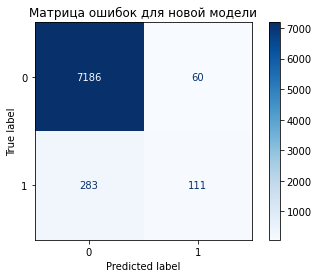

In [ ]:
matrix = plot_confusion_matrix(logreg, X_test_new, y_test_new, cmap=plt.cm.Blues) # нарисуем матрицу ошибок
plt.title('Матрица ошибок для новой модели') 
plt.show(matrix) 

In [ ]:
print(classification_report(y_test_new, y_pred_new)) # выведем рассчитанные метрики качества

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7246
           1       0.65      0.28      0.39       394

    accuracy                           0.96      7640
   macro avg       0.81      0.64      0.68      7640
weighted avg       0.95      0.96      0.95      7640



Если сравнивать две выборки без статистических неважных данных по тесту Вальда и с ними. 
То у новой выборки точность выше. 0.65 против 0.64

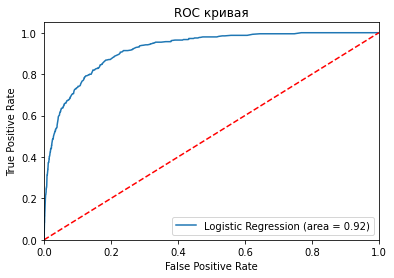

In [ ]:
logit_roc_auc_new = roc_auc_score(y_test_new, logreg.predict_proba(X_test_new)[:,1]) # Расчет AUROC. На вход подаются наблюдаемые значения тестовой выборки и прогнозные
#logreg.predict_proba возвращает массив вероятностей принадлежности к каждому классу. Т.е. первый столбец - это вероятность того что у=0, второй - у=1
fpr, tpr, thresholds = roc_curve(y_test_new, logreg.predict_proba(X_test_new)[:,1]) # Построение ROC- кривой
plt.figure() # создадим график
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc) #отобразим на графике ROC-кривую и значение AUROC
plt.plot([0, 1], [0, 1],'r--') # отобразим на графике ROC-кривую для случайной модели
plt.xlim([0.0, 1.0]) # ограничим отображение оси х на интервале [0,1] для удобной визуализации
plt.ylim([0.0, 1.05])# ограничим отображение оси y на интервале [0,1.05] для удобной визуализации
plt.xlabel('False Positive Rate') # название оси х
plt.ylabel('True Positive Rate') # название оси y
plt.title('ROC кривая')# название графика
plt.legend(loc="lower right") # расположение легенды
plt.savefig('Log_ROC') # сохранить график
plt.show(); # отобразить график

In [ ]:
gini_new = 2 * logit_roc_auc_new - 1
print('Коэффициент Джини:', round(gini_new,2))

Коэффициент Джини: 0.84


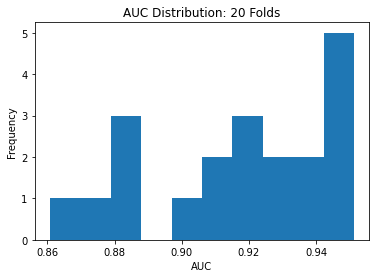

In [ ]:
scores = cross_val_score(logreg, X_test_new, y_test_new, cv=20, scoring='roc_auc') # вызов функции, в качестве аргументов предеются:
#logreg - построенная модель
#X_test - тестовая выборка независимых переменных 
#y_test - тестовые значения зависимых переменных
#cv - количество наборов g
#scoring - метрика, которая рассчитывается для каждой полученной модели

plt.figure() # создадим график
plt.hist(scores) # нарисуем гистограмму полученных значений AUROC
plt.xlabel('AUC') # название оси х
plt.ylabel('Frequency')# название оси у
plt.title('AUC Distribution: 20 Folds') # название графика
plt.show();# отображение графика